<a href="https://colab.research.google.com/github/EgorTrushin/HEG/blob/main/MNIST_ConvNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple MNIST ConvNet

**Date created:** 2021/04/21

**Description:** A simple convnet that achieves ~99% test accuracy on MNIST. Heavily based on https://keras.io/examples/vision/mnist_convnet/

### Setup

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

### Prepare the data

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### Visualize digits from the MNIST dataset

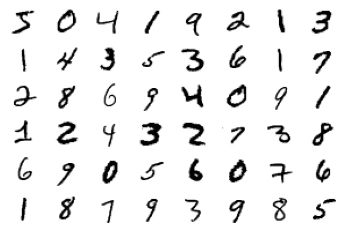

In [8]:
fig, axes = plt.subplots(6, 8)

i=0
for axs in axes:
    for ax in axs:
        ax.imshow(x_train[i].reshape(28,28), cmap="binary")
        ax.axis("off")
        i+=1

plt.show()

### Build the model

In [3]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

### Train the model

In [4]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 40s 92ms/step - loss: 0.7759 - accuracy: 0.7596 - val_loss: 0.0806 - val_accuracy: 0.9782
Epoch 2/15
422/422 [==============================] - 38s 91ms/step - loss: 0.1157 - accuracy: 0.9639 - val_loss: 0.0553 - val_accuracy: 0.9842
Epoch 3/15
422/422 [==============================] - 39s 91ms/step - loss: 0.0849 - accuracy: 0.9733 - val_loss: 0.0460 - val_accuracy: 0.9873
Epoch 4/15
422/422 [==============================] - 42s 100ms/step - loss: 0.0708 - accuracy: 0.9791 - val_loss: 0.0398 - val_accuracy: 0.9880
Epoch 5/15
422/422 [==============================] - 42s 99ms/step - loss: 0.0620 - accuracy: 0.9805 - val_loss: 0.0379 - val_accuracy: 0.9905
Epoch 6/15
422/422 [==============================] - 42s 99ms/step - loss: 0.0547 - accuracy: 0.9832 - val_loss: 0.0406 - val_accuracy: 0.9902
Epoch 7/15
422/422 [==============================] - 42s 100ms/step - loss: 0.0485 - accuracy: 0.9845 - val_loss: 0.0345 - val_accurac

### Evaluate the trained model

In [5]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.023523645475506783
Test accuracy: 0.9923999905586243


### Deeper analysis

In [22]:
y_pred = model.predict(x_test)

for i in range(20):
    print(i, np.argmax(y_test[i]), np.argmax(y_pred[i]))

0 7 7
1 2 2
2 1 1
3 0 0
4 4 4
5 1 1
6 4 4
7 9 9
8 5 5
9 9 9
10 0 0
11 6 6
12 9 9
13 0 0
14 1 1
15 5 5
16 9 9
17 7 7
18 3 3
19 4 4
